## Problem Statement

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of  variables to understand the demand for shared bikes among the people. You will need to submit a Jupyter notebook for the same.

#### Problem Statement


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Data Preparation

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

#### Model Evaluation

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.<br /> 
<br /> 
                <b> from sklearn.metrics import r2_score  <br /> 
                    r2_score(y_test, y_pred)</b>

## Import required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding Data & Data Preparation

In [3]:
bike_sharing = pd.read_csv(r"day.csv")
bike_sharing.head()                   

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing=bike_sharing.drop('dteday',axis=1)
bike_sharing.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing=bike_sharing.drop('instant',axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_sharing=bike_sharing.drop('casual',axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600


In [7]:
bike_sharing=bike_sharing.drop('registered',axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Converting continuous variables to categorical variables

<b><u>Categorical Data Encoding</u></b>

| <b>Variable</b> | <b>Categorical Value</b> | <b>Numeric/Actual value</b> | 
| :-------- | :---- | :---- |
|<b>season</b>   |spring|1 | 
|   |summer|2 |
|   |fall|3 |
|   |winter|4 |
|<b>month</b> |Jan|1|
| |Feb|2|
| |Mar|3|
| |Apr|4|
| |May|5|
| |Jun|6|
| |Jul|7|
| |Aug|8|
| |Sept|9|
| |Oct|10|
| |Nov|11|
| |Dec|12|
|<b>weathersit</b> |Clear|1|
| |Mist & Cloudy|2|
| |Light snow rain|3|
| |Heavy snow rain|4|
|<b>weekdays</b> |Monday|1|
| |Tuesday|2|
| |Wednesday|3|
| |Thursday|4|
| |Friday|5|
| |Saturday|6|
| |Sunday|7|


In [9]:
bike_sharing['season'].replace({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' }, inplace=True)
bike_sharing['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [10]:
import calendar

In [11]:
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_sharing['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [12]:
bike_sharing['weathersit'].replace({1 : 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow Rain', 4: 'Heavy Snow Rain' }, inplace = True)
bike_sharing['weathersit'].head()

0    Mist & Cloudy
1    Mist & Cloudy
2            Clear
3            Clear
4            Clear
Name: weathersit, dtype: object

In [13]:
bike_sharing['weekday'].replace({0 : 'Sunday', 1:'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5:'Friday' ,6:'Saturday' }, inplace=True)

## Visualize and dropping the columns

### Plotting a Correlation Matrix

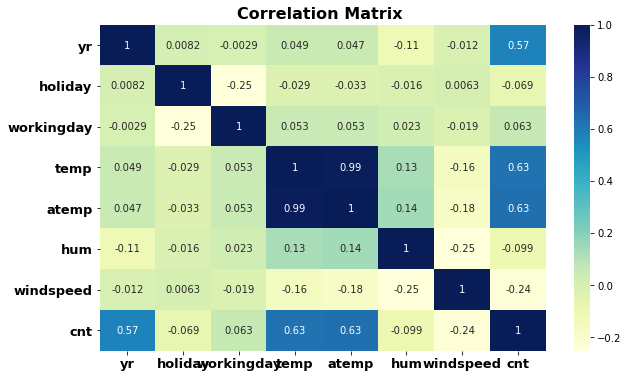

In [14]:
plt.figure(figsize = (10, 6))
plt.title("Correlation Matrix ",fontweight='bold', fontsize=16)

sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu")
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.show()

Observations:
- The correlation of following variables is higher with the variable `cnt`:
    - yr(year (0: 2018, 1:2019))
    - temp(temperature in Celsius)
    - atemp(feeling temperature in Celsius)

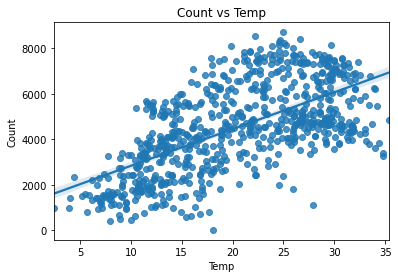

In [15]:
sns.regplot(x="temp", y="cnt",data=bike_sharing)
plt.title('Count vs Temp')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.show()

- regplot() : This method is used to plot data and a linear regression model fit.

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

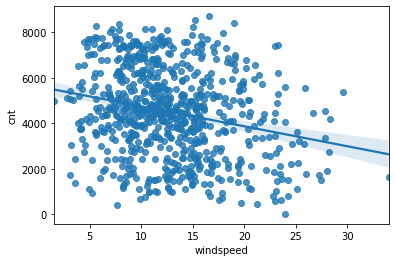

In [16]:
sns.regplot(x='windspeed', y='cnt', data = bike_sharing)

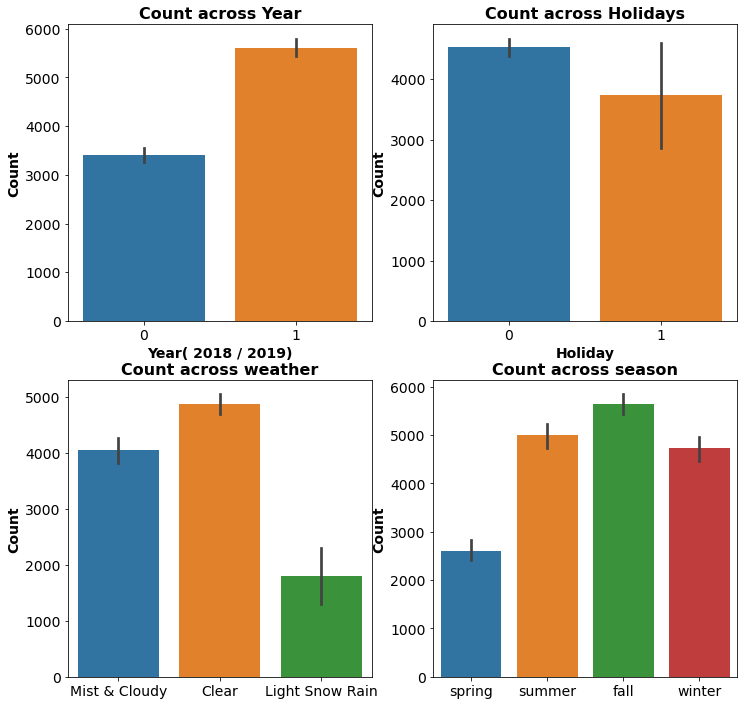

In [17]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.barplot(x='yr', y='cnt', data = bike_sharing)
plt.title("Count across Year",fontweight='bold', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel("Year( 2018 / 2019)", fontsize = 14, fontweight ='bold' )
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )

plt.subplot(2,2,2)
sns.barplot(x='holiday', y='cnt', data = bike_sharing)
plt.title("Count across Holidays",fontweight='bold', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel("Holiday", fontsize = 14, fontweight ='bold' )
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )


plt.subplot(2,2,3)
sns.barplot(x='weathersit', y='cnt', data = bike_sharing)
plt.title("Count across weather",fontweight='bold', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel(" ", fontsize = 14 )
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )

plt.subplot(2,2,4)
sns.barplot(x='season', y='cnt', data = bike_sharing)
plt.title("Count across season",fontweight='bold', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel(" ", fontsize = 14 )
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )



plt.show()

Observations:
- `cnt` is higher in 2019 than 2018
- `cnt` is higher on a non-holiday
- `cnt` is higher when the weather is clear
-`cnt` is higher during the fall season

### Dropping the temp variable

In [18]:
bike_sharing=bike_sharing.drop('temp',axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [19]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Split training and test Data set, before going for scaling 

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
num_vars = [ 'atemp', 'hum', 'windspeed', 'cnt' ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
653,winter,1,Oct,0,Tuesday,1,Clear,0.501133,0.575354,0.300794,0.864243
576,fall,1,Jul,0,Tuesday,1,Clear,0.766351,0.725633,0.264686,0.827658
426,spring,1,Mar,0,Saturday,0,Mist & Cloudy,0.438975,0.640189,0.255342,0.465255
728,spring,1,Dec,0,Sunday,0,Clear,0.200348,0.498067,0.663106,0.204096
482,summer,1,Apr,0,Saturday,0,Mist & Cloudy,0.391735,0.504508,0.188475,0.482973


In [25]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dummy Variables

In [26]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'

status = pd.get_dummies(bike_sharing['season'])

# Check what the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [27]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status'

status = pd.get_dummies(bike_sharing['mnth'])

# Check what the dataset 'status' looks like
status.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status'

status = pd.get_dummies(bike_sharing['weekday'])

# Check what the dataset 'status' looks like
status.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [29]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'

status = pd.get_dummies(bike_sharing['weathersit'])

# Check what the dataset 'status' looks like
status.head()

,Clear,Light Snow Rain,Mist & Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
status = pd.get_dummies(bike_sharing['season'], drop_first = True)

# Add the results to the original bike dataframe
bike_sharing= pd.concat([bike_sharing, status], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [31]:
status = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)

# Add the results to the original bike dataframe
bike_sharing= pd.concat([bike_sharing, status], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow Rain,Mist & Cloudy
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [32]:
# Drop 'season' as we have created the dummies for it
bike_sharing.drop(['season'], axis = 1, inplace = True)

bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow Rain,Mist & Cloudy
0,0,Jan,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [33]:
# Drop 'weathersit' as we have created the dummies for it
bike_sharing.drop(['weathersit'], axis = 1, inplace = True)

bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow Rain,Mist & Cloudy
0,0,Jan,0,Saturday,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [34]:
status = pd.get_dummies(bike_sharing['mnth'], drop_first = True)

# Add the results to the original bike dataframe
bike_sharing= pd.concat([bike_sharing, status], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Saturday,0,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Sunday,0,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Monday,1,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Drop 'mnth' as we have created the dummies for it
bike_sharing.drop(['mnth'], axis = 1, inplace = True)

bike_sharing.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Saturday,0,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
status = pd.get_dummies(bike_sharing['weekday'], drop_first = True)

# Add the results to the original bike dataframe
bike_sharing= pd.concat([bike_sharing, status], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Drop 'weekday' as we have created the dummies for it
bike_sharing.drop(['weekday'], axis = 1, inplace = True)

bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE - Recursive feature elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Snow Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Light Snow Rain', 'Mist & Cloudy', 'Jan', 'Jul', 'Sep',
       'Saturday', 'Sunday'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col]

In [48]:
# Just ot reuse heatmap plotting logic
def plotHeatMap(data):
    plt.figure(figsize = (20, 26), dpi=120)
    plt.subplot(2, 1, 1)
    sns.heatmap(data.corr(), annot = True )  # You can also try with this color cmap="YlGnBu"
    plt.show()

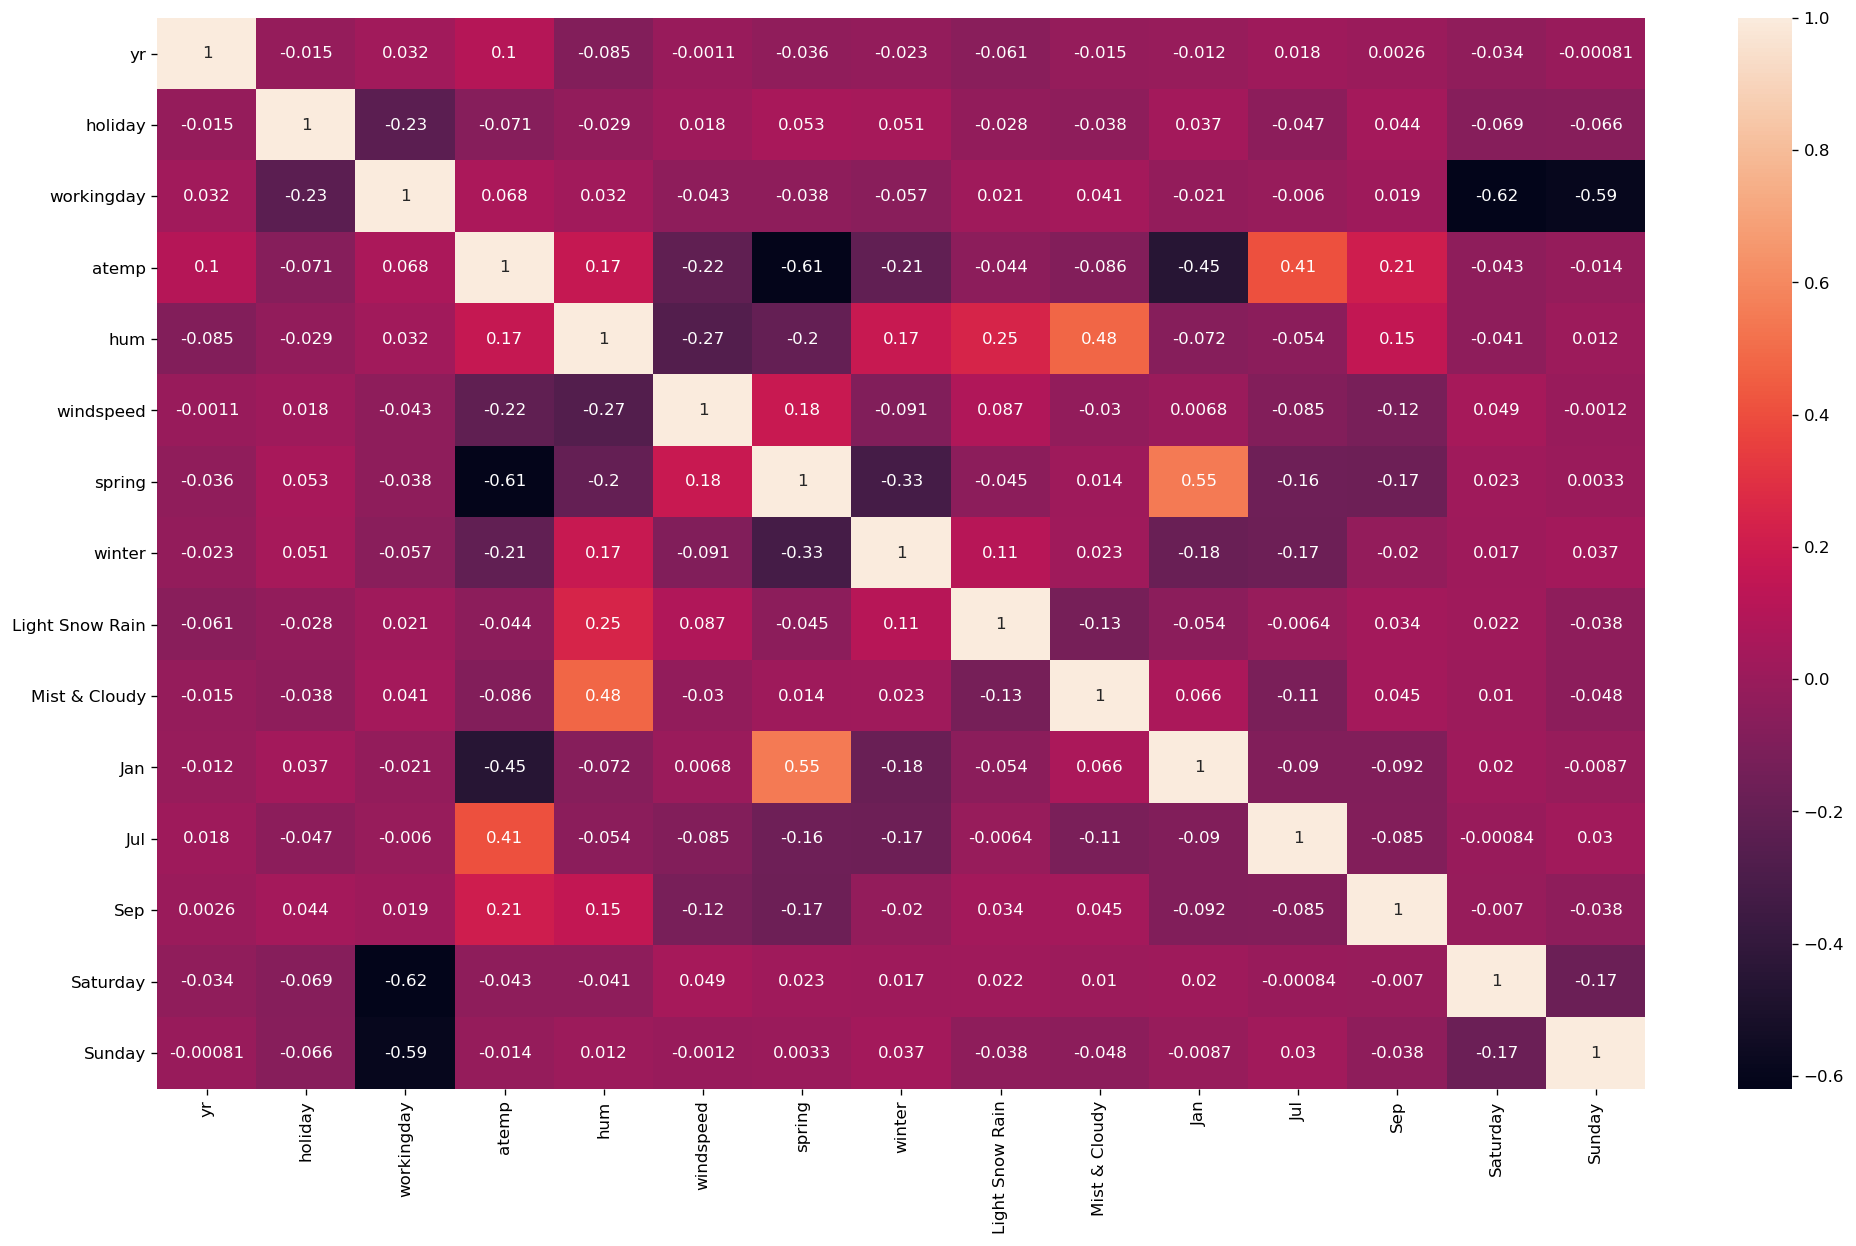

In [49]:
# Plot heatmap
plotHeatMap(X_train_rfe)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.66e-188
Time:                        17:03:52   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2535      0.026     

In [53]:
X_train = X_train_rfe.drop(["Sunday"], axis = 1)

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

In [55]:
lm= sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.66e-188
Time:                        17:03:52   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3064      0.033     

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [57]:
X_train= X_train.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.59
3,atemp,16.73
2,workingday,5.20
5,windspeed,4.11
6,spring,2.92
9,Mist & Cloudy,2.24
0,yr,2.07
7,winter,2.07
13,Saturday,1.95
10,Jan,1.68


In [59]:
X_train = X_train.drop(["Mist & Cloudy"], axis = 1)

In [60]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

In [61]:
lm= sm.OLS(y_train,X_train_lm).fit()

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.00e-183
Time:                        17:03:53   Log-Likelihood:                 494.52
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     496   BIC:                            -901.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3535      0.033     

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features    VIF
4               hum  17.06
3             atemp  14.45
2        workingday   5.20
5         windspeed   4.11
6            spring   2.79
0                yr   2.07
7            winter   1.96
12         Saturday   1.95
9               Jan   1.67
10              Jul   1.40
11              Sep   1.20
1           holiday   1.17
8   Light Snow Rain   1.12


In [64]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['workingday'],axis= 1,)

In [65]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_lm).fit()# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.28e-182
Time:                        17:03:53   Log-Likelihood:                 489.33
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     497   BIC:                            -897.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3868      0.032     

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features    VIF
3               hum  16.23
2             atemp  13.67
4         windspeed   3.99
5            spring   2.73
0                yr   2.06
6            winter   1.95
8               Jan   1.67
9               Jul   1.40
10              Sep   1.20
11         Saturday   1.19
7   Light Snow Rain   1.12
1           holiday   1.05


In [67]:
X_train= X_train.drop(['hum'], axis=1)

In [68]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr_2= sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          6.43e-169
Time:                        17:03:54   Log-Likelihood:                 455.55
No. Observations:                 510   AIC:                            -887.1
Df Residuals:                     498   BIC:                            -836.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2210      0.026     

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
2             atemp  4.36
3         windspeed  3.92
4            spring  2.23
0                yr  2.06
7               Jan  1.59
5            winter  1.38
8               Jul  1.33
9               Sep  1.20
10         Saturday  1.19
6   Light Snow Rain  1.06
1           holiday  1.05


In [71]:
X_train= X_train.drop(['winter'], axis=1)

In [72]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr_2= sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     202.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.87e-168
Time:                        17:03:54   Log-Likelihood:                 451.69
No. Observations:                 510   AIC:                            -881.4
Df Residuals:                     499   BIC:                            -834.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2659      0.021     

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.33
3,windspeed,3.76
4,spring,2.10
0,yr,2.04
6,Jan,1.59
7,Jul,1.29
8,Sep,1.19
9,Saturday,1.18
5,Light Snow Rain,1.05
1,holiday,1.04


In [74]:
X_train= X_train.drop(['Jul'], axis=1)

In [75]:
X_train_lm = sm.add_constant(X_train)

lr_2= sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.7
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          7.01e-168
Time:                        17:03:55   Log-Likelihood:                 447.54
No. Observations:                 510   AIC:                            -875.1
Df Residuals:                     500   BIC:                            -832.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2805      0.020     

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.66
2,atemp,3.61
4,spring,2.10
0,yr,2.03
6,Jan,1.58
8,Saturday,1.18
7,Sep,1.15
5,Light Snow Rain,1.05
1,holiday,1.04


In [77]:
X_train= X_train.drop(['Saturday'], axis=1)

In [78]:
X_train_lm = sm.add_constant(X_train)

lr_2= sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.37e-168
Time:                        17:03:55   Log-Likelihood:                 446.35
No. Observations:                 510   AIC:                            -874.7
Df Residuals:                     501   BIC:                            -836.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.020     

In [79]:
y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

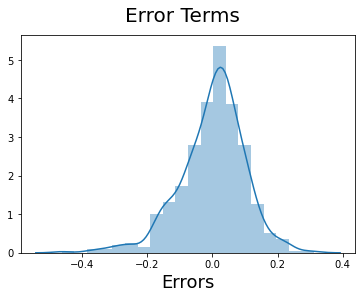

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [81]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 

In [84]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [85]:
lr_2= sm.OLS(y_test, X_test_new).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.94e-68
Time:                        17:03:56   Log-Likelihood:                 196.57
No. Observations:                 219   AIC:                            -375.1
Df Residuals:                     210   BIC:                            -344.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2771      0.031     

In [86]:
# Making predictions
y_pred = lr_2.predict(X_test_new)

## Plotting y_test VS y_pred 

Text(0, 0.5, 'y_pred')

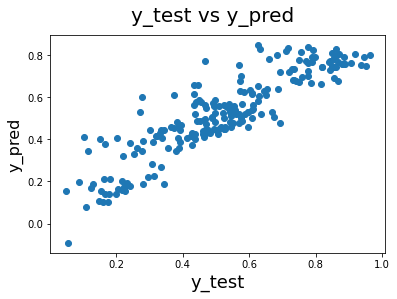

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7952465320900121